In [1]:

import pandas as pd

# from python_code.section_classification.evaluate_heuristics import evaluate_heuristics

# Load the benchmark data
hand_labels = pd.read_pickle('./data/benchmarks/benchmark_hand_labeled.pkl')
all_data_df = pd.read_pickle('./data/processed_embeddings_light_20250715_132106.pkl')

# print(hand_labels.keys())
# print(all_data_df.keys())

In [3]:
df= pd.merge(
    all_data_df,
    hand_labels[['article_id', 'section_title', 'hand_labels']],
    on=['article_id', 'section_title'],
    how='inner'
)
df = df.rename(columns={'hand_labels': 'section_hand_label'})
df.keys()

Index(['article_abstract', 'article_articleType', 'article_authors',
       'article_affiliations', 'article_date', 'article_type',
       'article_metadata_last_modified_at', 'article_last_modified_at',
       'article_id', 'article_identifiers', 'article_issue',
       'article_pageStart', 'article_hasArticleId', 'article_numPages',
       'article_publisher', 'article_rights', 'article_journal',
       'article_title', 'article_volume', 'article_notes',
       'article_tocSection', 'article_fundings',
       'article_classificationSchemes', 'article_doi', 'article_full_text_xml',
       'article_full_text', 'article_year', 'section_relative_position',
       'section_label', 'section_title', 'section_content', 'section_id',
       'section_title_embedding', 'section_content_embedding',
       'section_hand_label'],
      dtype='object')

In [4]:
from python_code.section_classification.heuristics import classify_sections_with_heuristics




classification_results = classify_sections_with_heuristics(df)


In [19]:
from python_code.helpers import save_processed_embeddings
save_processed_embeddings(classification_results, 'data/heuristics_results')

Saved processed_embeddings to data/heuristics_results_20250721_115801.pkl


'data/heuristics_results_20250721_115801.pkl'

In [5]:
classification_results["classification_highest_prob-heuristics"].apply(type).value_counts()

classification_highest_prob-heuristics
<class 'str'>    127
Name: count, dtype: int64

In [26]:
classification_results.keys()

Index(['article_abstract', 'article_articleType', 'article_authors',
       'article_affiliations', 'article_date', 'article_type',
       'article_metadata_last_modified_at', 'article_last_modified_at',
       'article_id', 'article_identifiers', 'article_issue',
       'article_pageStart', 'article_hasArticleId', 'article_numPages',
       'article_publisher', 'article_rights', 'article_journal',
       'article_title', 'article_volume', 'article_notes',
       'article_tocSection', 'article_fundings',
       'article_classificationSchemes', 'article_doi', 'article_full_text_xml',
       'article_full_text', 'article_year', 'section_relative_position',
       'section_label', 'section_title', 'section_content', 'section_id',
       'section_title_embedding', 'section_content_embedding',
       'section_hand_label', 'probability_dist-heuristics',
       'classification_highest_prob-heuristics', 'confidence_score-heuristics',
       'meets_confidence_threshold-heuristics',
       'fail

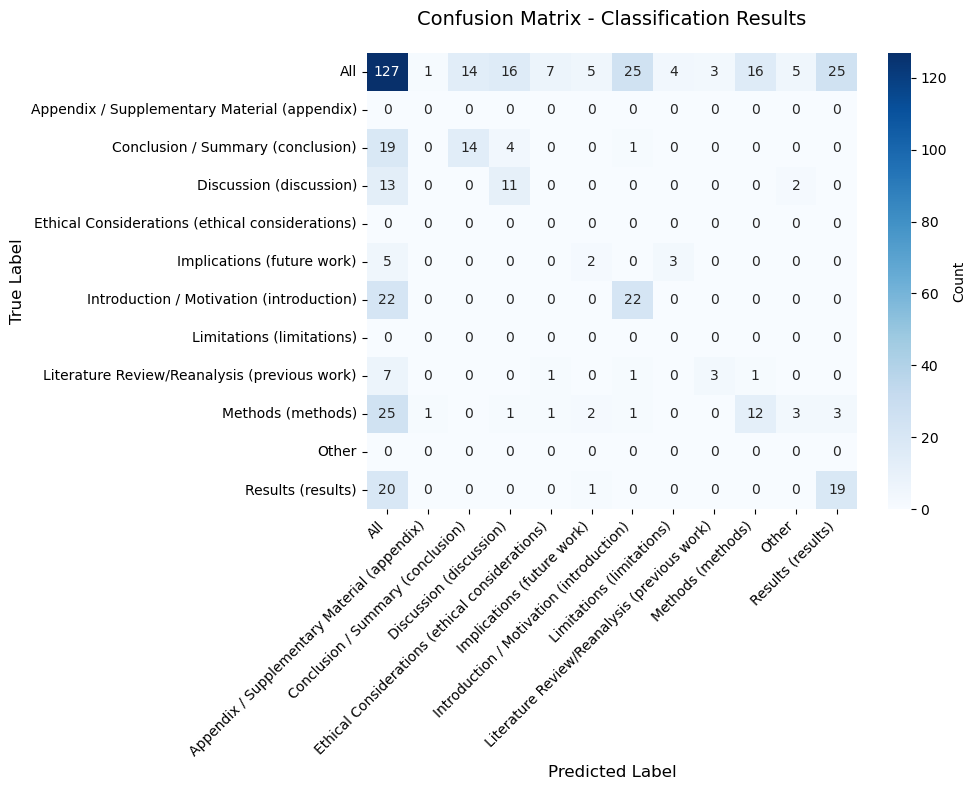

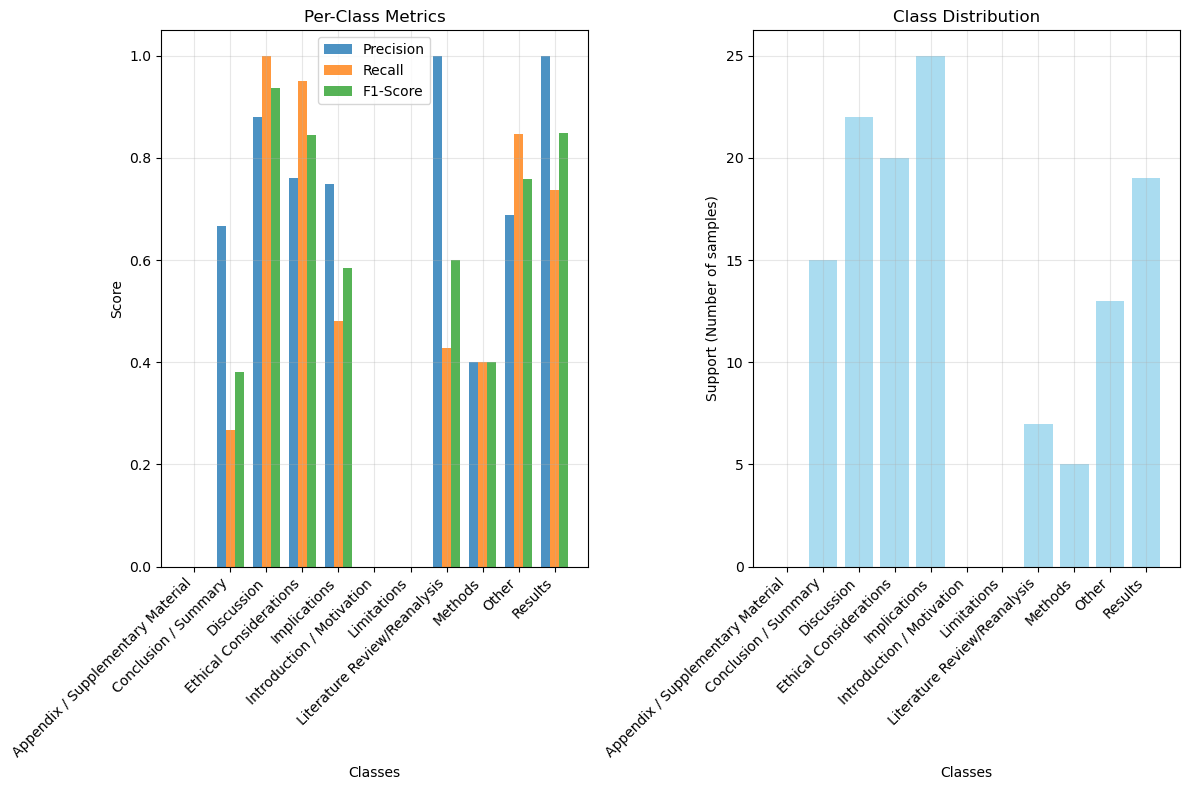


Report and plots saved to: Heurstics_Evaluation_20250721_124626


# Heurstics Evaluation (20250721_124626)
*Generated on 2025-07-21 12:46:40*

## Input Information

| Parameter | Value |
|-----------|-------|
| Data file | heuristics_results_20250721_115801.pkl |
| Classifications JSON | data/classifiers_LLM_generated.json |

### Parameters
| Parameter | Value |
|-----------|-------|
| pred_col | classification_highest_prob-heuristics |
| true_label_col | section_hand_label |
| section_title_col | section_title |
| probability_dist_col | probability_dist-heuristics |
| include_statistical_tests | True |

## Overall Performance

**Overall Accuracy:** 68.5% (87/127)

### Macro Average Metrics
| Metric | Value |
|--------|-------|
| Precision | 0.473 |
| Recall | 0.393 |
| F1-Score | 0.412 |

### Weighted Average Metrics
| Metric | Value |
|--------|-------|
| Precision | 0.789 |
| Recall | 0.685 |
| F1-Score | 0.709 |

## Per-Category Performance

| Category | Accuracy | Correct/Total |
|----------|----------|---------------|
| Introduction / Motivation | 100.0% | 22/22 |
| Methods | 48.0% | 12/25 |
| Results | 95.0% | 19/20 |
| Discussion | 84.6% | 11/13 |
| Conclusion / Summary | 73.7% | 14/19 |
| Literature Review/Reanalysis | 42.9% | 3/7 |
| Theoretical Framework | 26.7% | 4/15 |
| Implications | 40.0% | 2/5 |

## Top Misclassification Patterns

| True Label | Predicted Label | Count |
|------------|-----------------|-------|
| Conclusion / Summary | Discussion | 4 |
| Theoretical Framework | Ethical Considerations | 4 |
| Implications | Limitations | 3 |
| Methods | Results | 3 |
| Methods | Other | 3 |
| Theoretical Framework | Results | 3 |
| Theoretical Framework | Methods | 3 |
| Discussion | Other | 2 |
| Methods | Implications | 2 |
| Literature Review/Reanalysis | Ethical Considerations | 1 |

## Mapping Issues

- Unmapped true labels: {'other'}
- Unmapped categories: {'Other'}

## Statistical Tests

## Data Distributions

### True Label Distribution
```
section_hand_label
methods          25
introduction     22
results          20
conclusion       19
theory           15
discussion       13
previous work     7
future work       5
other             1
Name: count, dtype: int64
```

### Classification Distribution
```
classification_highest_prob-heuristics
Introduction / Motivation            25
Results                              25
Discussion                           16
Methods                              16
Conclusion / Summary                 14
Ethical Considerations                7
Theoretical Framework                 6
Other                                 5
Implications                          5
Limitations                           4
Literature Review/Reanalysis          3
Appendix / Supplementary Material     1
Name: count, dtype: int64
```

## Metrics Summary

### Understanding the Metrics

- **Precision**: Of the instances predicted as positive, what fraction was actually positive?
- **Recall**: Of the actual positive instances, what fraction was correctly predicted?
- **F1-Score**: Harmonic mean of precision and recall, providing a balanced measure.

### Macro vs Weighted Averages

- **Macro Average**: Simple average across all classes. Each class contributes equally regardless of size.
- **Weighted Average**: Average weighted by the number of true instances for each class. Larger classes have more influence.

### When to Use Each

- Use **Macro** when all classes are equally important, regardless of class imbalance.
- Use **Weighted** when you want to account for class imbalance and give more weight to larger classes.

## Plots Generated

**Confusion Matrix:** ![Confusion Matrix](confusion_matrix_20250721_124626.png)

**Metrics Summary:** ![Metrics Summary](metrics_summary_20250721_124626.png)


{'overall_accuracy': np.float64(0.6850393700787402),
 'total_predictions': 127,
 'correct_predictions': np.int64(87),
 'confusion_matrix':                                                    All  \
 All                                              127.0   
 Appendix / Supplementary Material (appendix)       0.0   
 Conclusion / Summary (conclusion)                 19.0   
 Discussion (discussion)                           13.0   
 Ethical Considerations (ethical considerations)    0.0   
 Implications (future work)                         5.0   
 Introduction / Motivation (introduction)          22.0   
 Limitations (limitations)                          0.0   
 Literature Review/Reanalysis (previous work)       7.0   
 Methods (methods)                                 25.0   
 Other                                              0.0   
 Results (results)                                 20.0   
 All                                               15.0   
 
                                  

In [31]:
from python_code.section_classification.evaluation.evaluation import run_classification_evaluation
run_classification_evaluation("data/heuristics_results_20250721_115801.pkl", classifications_json_path='data/classifiers_LLM_generated.json',
                              true_label_col='section_hand_label', pred_col='classification_highest_prob-heuristics', section_title_col='section_title', probability_dist_col='probability_dist-heuristics', report_name='Heurstics Evaluation', save_report=True)